In [1]:
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os


In [21]:
imagePath = 'C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/S2A_MSIL2A_20210930T120331_N0301_R023_T28RBS_20210930T142131.SAFE/GRANULE/L2A_T28RBS_A032767_20210930T120327/IMG_DATA/R10m/'
band2 = rasterio.open(imagePath+'T28RBS_20210930T120331_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T28RBS_20210930T120331_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T28RBS_20210930T120331_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T28RBS_20210930T120331_B08_10m.jp2', driver='JP2OpenJPEG') #nir
band11 = rasterio.open(imagePath+'B11_30092021.tif', driver='Gtiff') #swir

In [7]:
band4.count


1

In [8]:
band4.width

10980

In [9]:
band4.height

10980

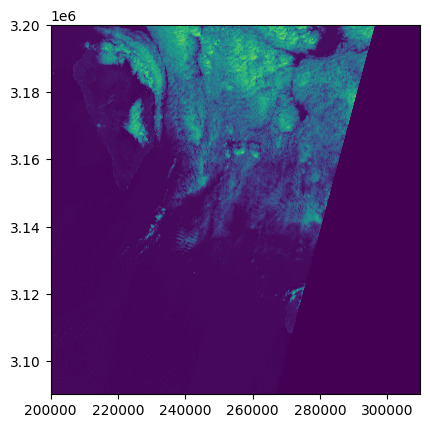

<AxesSubplot: >

In [10]:
plot.show(band4)

In [11]:
band4.dtypes[0]

'uint16'

In [12]:
band4.crs

In [13]:
band4.transform

Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 3200040.0)

In [14]:
band4.read(1)

array([[397, 381, 372, ...,   0,   0,   0],
       [395, 383, 349, ...,   0,   0,   0],
       [388, 417, 388, ...,   0,   0,   0],
       ...,
       [339, 366, 369, ...,   0,   0,   0],
       [293, 371, 374, ...,   0,   0,   0],
       [298, 393, 325, ...,   0,   0,   0]], dtype=uint16)

Text(0.5, 1.0, 'Red')

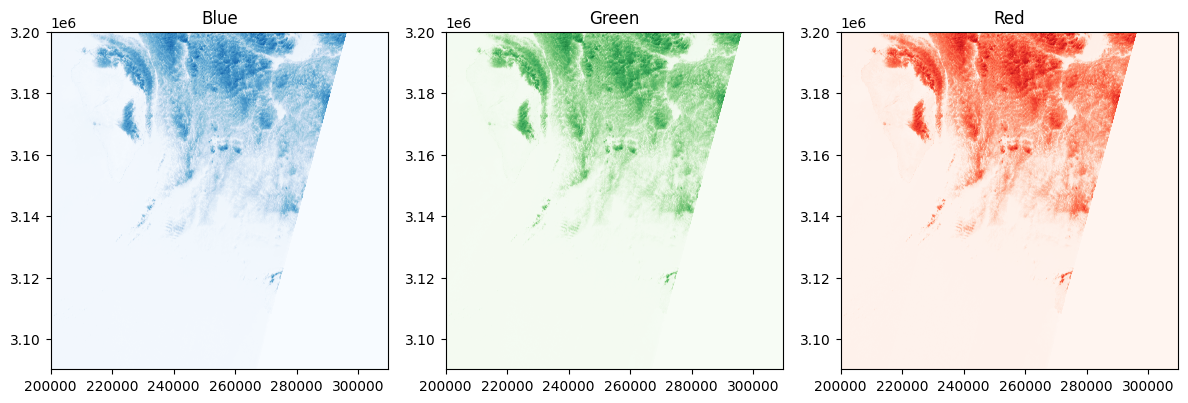

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')

fig.tight_layout()

ax1.set_title("Blue")
ax2.set_title("Green")
ax3.set_title("Red")


In [16]:

trueColor = rasterio.open('C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/output/TrueColor300921.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

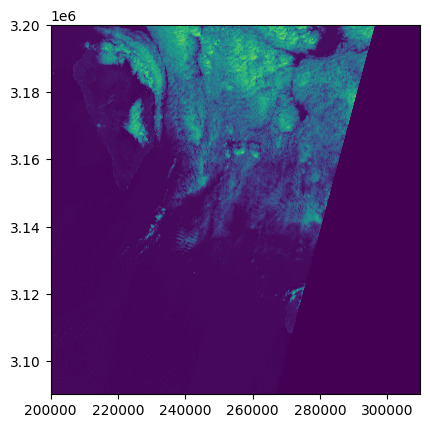

<AxesSubplot: >

In [17]:
src = rasterio.open(r"C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/output/TrueColor300921.tiff", count=3)
plot.show(src)

In [18]:
falseColor = rasterio.open('C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/output/FalseColor300921.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()

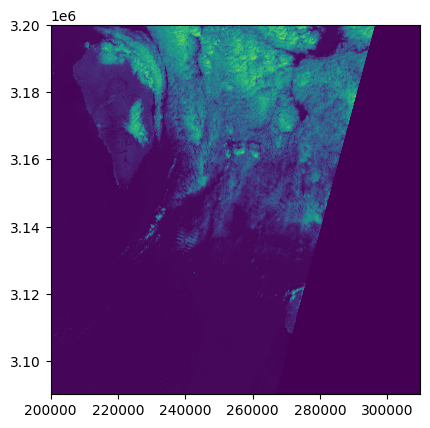

<AxesSubplot: >

In [19]:
src = rasterio.open(r"C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/output/FalseColor300921.tiff", count=3)
plot.show(src)

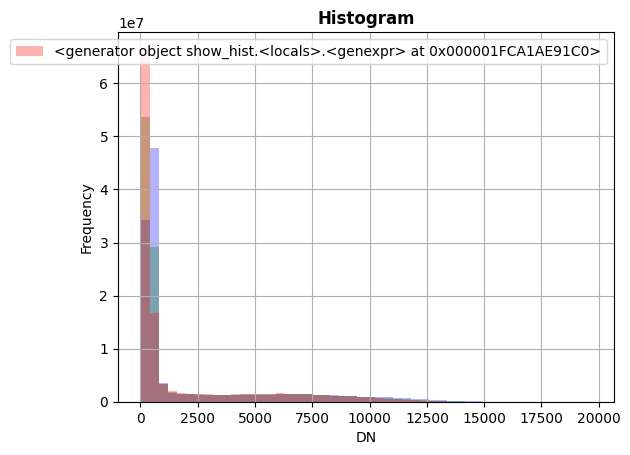

In [20]:
trueColor = rasterio.open('C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/output/TrueColor300921.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")